In [23]:
import pandas as pd

In [24]:
df = pd.read_excel("C:\\Users\\Nguyen_Thanh_Vinh\\Downloads\\CUSTOMER SEGMENTATION.xlsx")
df

,customerid,Recency,Frequency,Monetary,action,action-adventure,animation,comedy,crime,drama,...,H,I,J,K,DOB,gender,address,Website,job,industry
0,0000000014,25,1,90000,0,2,0,0,0,0,...,0,0,0,0,36268,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer
1,0000000034,1,2,180000,2,0,0,2,2,0,...,0,0,0,0,35901,Nam,man thai,KH0104|0333,student,health service
2,0000000051,9,1,90000,2,0,0,0,2,0,...,0,0,0,0,34319,Nam,que son quang nam,KH0104|0255,blue collar,economics
3,0000000081,26,2,180000,0,4,0,0,0,0,...,0,0,0,0,36472,Nam,truong chinh,KH0104|0293,student,economics
4,0000000098,6,2,180000,0,2,0,2,2,0,...,2,0,0,0,34608,Nam,cẩm lệ,KH0104|40580,blue collar,health service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,KH9855766,0,3,270000,2,3,0,0,2,0,...,0,2,3,0,34885,Nữ,"A, THUAN PHUOC,HAI CHAU, DA NANG",NaN,specialist,finance
4475,KH9958204,6,1,135000,0,0,0,3,0,0,...,0,0,0,3,36892,Nữ,"Phước Mỹ, ĐN",NaN,teenager,NaN
4476,WEBS00000043900,22,2,180000,0,0,0,2,0,0,...,1,0,0,0,32311,Nữ,nguyen gian thanh,KHWEBS|00006890,specialist,construction
4477,WEBS00000044909,1,1,180000,0,4,0,0,0,0,...,0,0,0,0,35316,Nữ,ngũ hành sơn,KHWEBS|00007899,blue collar,finance


In [25]:
columns_to_drop = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                   'Sáng', 'Trưa', 'Chiều', 'Tối', 'Khuya']

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [26]:
df.isnull().sum()

customerid             0
Recency                0
Frequency              0
Monetary               0
action                 0
action-adventure       0
animation              0
comedy                 0
crime                  0
drama                  0
family                 0
fantasy                0
horror                 0
melodrama              0
mystery                0
romance                0
sci-fi                 0
thriller               0
DOB                    1
gender                 1
address                2
Website              537
job                    1
industry            1123
dtype: int64

In [27]:
# Điền giá trị phổ biến nhất cho DOB, gender, job
df['DOB'].fillna(df['DOB'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['job'].fillna(df['job'].mode()[0], inplace=True)

# Điền industry bằng chuỗi 'Nan'
df['industry'].fillna('Nan', inplace=True)

# Xoá cột Website và address
df.drop(columns=['Website', 'address'], inplace=True)

C:\Users\Nguyen_Thanh_Vinh\AppData\Local\Temp\ipykernel_8784\2213359453.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DOB'].fillna(df['DOB'].mode()[0], inplace=True)
C:\Users\Nguyen_Thanh_Vinh\AppData\Local\Temp\ipykernel_8784\2213359453.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [28]:
df.isnull().sum()

customerid          0
Recency             0
Frequency           0
Monetary            0
action              0
action-adventure    0
animation           0
comedy              0
crime               0
drama               0
family              0
fantasy             0
horror              0
melodrama           0
mystery             0
romance             0
sci-fi              0
thriller            0
DOB                 0
gender              0
job                 0
industry            0
dtype: int64

In [29]:
def convert_excel_date(x):
    try:
        # Nếu là số -> chuyển từ Excel serial
        if isinstance(x, (int, float)):
            return pd.to_datetime(x, origin='1899-12-30', unit='D')
        # Nếu là chuỗi ngày hợp lệ
        else:
            return pd.to_datetime(x, errors='coerce')
    except:
        return pd.NaT  # Nếu không chuyển được thì gán NaT (null)

df['DOB'] = df['DOB'].apply(convert_excel_date)

In [30]:
# Sau khi chuyển đổi DOB, có một số giá trị bị lỗi vì hông hợp lệ hoặc bị định dạng sai
invalid_dob = df[df['DOB'].isna()]
invalid_dob

,customerid,Recency,Frequency,Monetary,action,action-adventure,animation,comedy,crime,drama,...,horror,melodrama,mystery,romance,sci-fi,thriller,DOB,gender,job,industry
1177,0001013549,12,1,315000,0,7,0,7,0,0,...,0,0,7,0,7,0,NaT,Nam,teenager,Nan
1563,0001077023,20,1,585000,0,0,0,0,0,0,...,13,0,13,0,0,13,NaT,Nam,teenager,Nan
2207,0001120656,5,6,540000,0,9,3,6,0,0,...,3,0,0,0,9,0,NaT,Nam,teenager,Nan


In [31]:
# Tìm giá trị xuất hiện nhiều nhất (mode), bỏ qua NaT
most_common_dob = df['DOB'].mode()[0]

# Thay thế NaT bằng giá trị xuất hiện nhiều nhất
df['DOB'].fillna(most_common_dob, inplace=True)

C:\Users\Nguyen_Thanh_Vinh\AppData\Local\Temp\ipykernel_8784\2046524930.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DOB'].fillna(most_common_dob, inplace=True)


In [32]:
df.columns

Index(['customerid', 'Recency', 'Frequency', 'Monetary', 'action',
       'action-adventure', 'animation', 'comedy', 'crime', 'drama', 'family',
       'fantasy', 'horror', 'melodrama', 'mystery', 'romance', 'sci-fi',
       'thriller', 'DOB', 'gender', 'job', 'industry'],
      dtype='object')

In [33]:
# Chuyển DOB thành tuổi
df['age'] = (pd.Timestamp('today') - df['DOB']).dt.days // 365
df_roof = df.copy()
df.drop(columns=['DOB'], inplace=True)

In [34]:
df

,customerid,Recency,Frequency,Monetary,action,action-adventure,animation,comedy,crime,drama,...,horror,melodrama,mystery,romance,sci-fi,thriller,gender,job,industry,age
0,0000000014,25,1,90000,0,2,0,0,0,0,...,0,0,0,0,2,0,Nữ,student,computer,26
1,0000000034,1,2,180000,2,0,0,2,2,0,...,2,0,0,0,0,2,Nam,student,health service,27
2,0000000051,9,1,90000,2,0,0,0,2,0,...,0,0,0,0,0,2,Nam,blue collar,economics,31
3,0000000081,26,2,180000,0,4,0,0,0,0,...,0,0,0,0,4,0,Nam,student,economics,25
4,0000000098,6,2,180000,0,2,0,2,2,0,...,0,0,0,0,2,2,Nam,blue collar,health service,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,KH9855766,0,3,270000,2,3,0,0,2,0,...,0,0,0,0,0,2,Nữ,specialist,finance,29
4475,KH9958204,6,1,135000,0,0,0,3,0,0,...,3,0,0,0,0,0,Nữ,teenager,Nan,24
4476,WEBS00000043900,22,2,180000,0,0,0,2,0,0,...,1,0,1,2,0,1,Nữ,specialist,construction,36
4477,WEBS00000044909,1,1,180000,0,4,0,0,0,0,...,0,0,0,0,0,0,Nữ,blue collar,finance,28


In [35]:
# One-Hot Encoding cho cột 'job' và 'industry'
df = pd.get_dummies(df, columns=['job', 'industry'], drop_first=True)

# Mã hóa cột phân loại 'gender' bằng cat.codes
df['gender'] = df['gender'].astype('category').cat.codes

In [36]:
from sklearn.preprocessing import StandardScaler

# Các cột số cần chuẩn hóa
numeric_columns = ['Recency', 'Frequency', 'Monetary', 'age'] + ['action', 'action-adventure', 'animation', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'horror', 'melodrama', 'mystery', 'romance', 'sci-fi', 'thriller']

# Chuẩn hóa dữ liệu số
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [37]:
df

,customerid,Recency,Frequency,Monetary,action,action-adventure,animation,comedy,crime,drama,...,job_white collar,industry_computer,industry_construction,industry_economics,industry_education,industry_engineering,industry_finance,industry_government agent,industry_health service,industry_social service
0,0000000014,1.241949,-0.030673,-0.032421,-0.046653,-0.018313,-0.03325,-0.041764,-0.045957,-0.04671,...,False,True,False,False,False,False,False,False,False,False
1,0000000034,-1.417239,-0.017154,-0.022240,0.086570,-0.044919,-0.03325,-0.006913,0.061870,-0.04671,...,False,False,False,False,False,False,False,False,True,False
2,0000000051,-0.530843,-0.030673,-0.032421,0.086570,-0.044919,-0.03325,-0.041764,0.061870,-0.04671,...,False,False,False,True,False,False,False,False,False,False
3,0000000081,1.352749,-0.017154,-0.022240,-0.046653,0.008292,-0.03325,-0.041764,-0.045957,-0.04671,...,False,False,False,True,False,False,False,False,False,False
4,0000000098,-0.863242,-0.017154,-0.022240,-0.046653,-0.018313,-0.03325,-0.006913,0.061870,-0.04671,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,KH9855766,-1.528039,-0.003634,-0.012059,0.086570,-0.005010,-0.03325,-0.041764,0.061870,-0.04671,...,False,False,False,False,False,False,True,False,False,False
4475,KH9958204,-0.863242,-0.030673,-0.027331,-0.046653,-0.044919,-0.03325,0.010512,-0.045957,-0.04671,...,False,False,False,False,False,False,False,False,False,False
4476,WEBS00000043900,0.909551,-0.017154,-0.022240,-0.046653,-0.044919,-0.03325,-0.006913,-0.045957,-0.04671,...,False,False,True,False,False,False,False,False,False,False
4477,WEBS00000044909,-1.417239,-0.030673,-0.022240,-0.046653,0.008292,-0.03325,-0.041764,-0.045957,-0.04671,...,False,False,False,False,False,False,True,False,False,False


In [38]:
from sklearn.cluster import KMeans

# Bỏ cột 'customerid' vì đó là chỉ mục và không tham gia vào quá trình phân cụm
X = df.drop(columns='customerid')

# Bước 1: Áp dụng K-Means với số cụm mong muốn (ví dụ 4 cụm)
kmeans = KMeans(n_clusters=4, random_state=42)

# Dự đoán nhãn phân cụm và gán vào cột 'cluster' trong df
df['cluster'] = kmeans.fit_predict(X)

# Xem kết quả phân cụm
print(df[['customerid', 'cluster']].head())

   customerid  cluster
0  0000000014        0
1  0000000034        3
2  0000000051        3
3  0000000081        0
4  0000000098        3


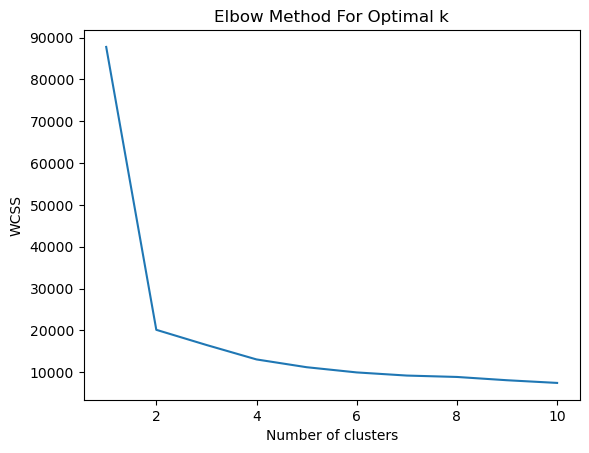

In [39]:
import matplotlib.pyplot as plt

# Tính toán WCSS (Within-cluster sum of squares) cho nhiều giá trị n_clusters
wcss = []
for i in range(1, 11):  # Kiểm tra từ 1 đến 10 cụm
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Vẽ đồ thị Elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
df_segmentation = pd.merge(df_roof, df[['customerid', 'cluster']], on="customerid", how="left")

In [42]:
df_segmentation.to_excel("C:\\Users\\Nguyen_Thanh_Vinh\\Downloads\\SEGMENTATION.xlsx", index = None)